## Import the Libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from scipy.stats import uniform
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Train.CSV

### Import the Dataset

In [0]:
# read in the train.csv
df = pd.read_csv('train.csv')

In [0]:
# change max rows to 999
pd.options.display.max_rows = 3000

In [5]:
# confirm change
pd.options.display.max_rows

3000

In [0]:
# change max columns to 999
pd.options.display.max_columns = 999

In [7]:
# confirm change
pd.options.display.max_columns

999

### Explore Training Data

In [8]:
# get basic info on the train.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
# get the descriptive statistics for the train data
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Clean Data

#### Change Feature Formatting

In [0]:
# lowercase everything, strip out spaces and replace with '_' and strip white space
# credit: Quinton
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
# verify changes were made
df.head(0)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


#### Resolve Missing Numeric Data

##### Create a List of Numeric Features

In [0]:
# remove 'object' dtypes
# from dataframe to resolve missing numeric values
# credit: StackOverflow
dfnums = df.select_dtypes(exclude=['object'])

##### Replace Missing Values with the Mean of the Numeric Values

In [13]:
# get counts on missing data and sort from most to least
dfnums.isnull().sum().sort_values(ascending=False)

lot_frontage       330
garage_yr_blt      114
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
garage_area          1
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
low_qual_fin_sf      0
ms_subclass          0
pid                  0
1st_flr_sf           0
2nd_flr_sf           0
saleprice            0
gr_liv_area          0
open_porch_sf        0
mo_sold              0
misc_val             0
pool_area            0
screen_porch         0
3ssn_porch           0
enclosed_porch       0
wood_deck_sf         0
yr_sold              0
fireplaces           0
totrms_abvgrd        0
kitchen_abvgr        0
bedroom_abvgr        0
half_bath            0
full_bath            0
id                   0
dtype: int64

In [14]:
# use .fillna to replace all missing numeric values
# with the mean of values for each feature
# credit: https://machinelearningmastery.com/handle-missing-data-python/
dfnums.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
# confirm numeric missing values are resolved
dfnums.isnull().sum().sort_values(ascending=False)

saleprice          0
mas_vnr_area       0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
total_bsmt_sf      0
bsmt_unf_sf        0
bsmtfin_sf_2       0
bsmtfin_sf_1       0
year_remod/add     0
bsmt_full_bath     0
year_built         0
overall_cond       0
overall_qual       0
lot_area           0
lot_frontage       0
ms_subclass        0
pid                0
gr_liv_area        0
bsmt_half_bath     0
yr_sold            0
wood_deck_sf       0
mo_sold            0
misc_val           0
pool_area          0
screen_porch       0
3ssn_porch         0
enclosed_porch     0
open_porch_sf      0
garage_area        0
full_bath          0
garage_cars        0
garage_yr_blt      0
fireplaces         0
totrms_abvgrd      0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
id                 0
dtype: int64

### Visualize the Data

##### Identify Relationships

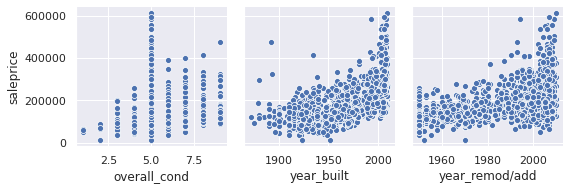

In [19]:
# this tells us that overall condition is not a good predictor
sns.pairplot(dfnums, x_vars=['overall_cond', 'year_built', 'year_remod/add'], y_vars=['saleprice']);

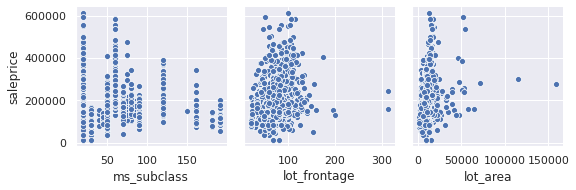

In [20]:
# this tells us that these are not good predictors
sns.pairplot(dfnums, x_vars=['ms_subclass', 'lot_frontage', 'lot_area'], y_vars=['saleprice']);

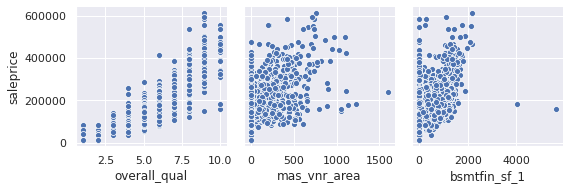

In [21]:
# these variables may not be the best predictors
sns.pairplot(dfnums, x_vars=['overall_qual', 'mas_vnr_area', 'bsmtfin_sf_1'], y_vars=['saleprice']);

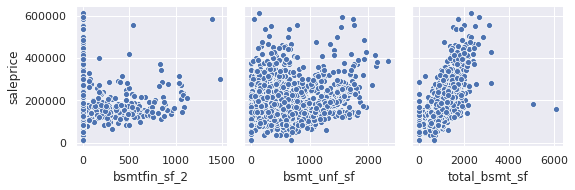

In [22]:
# it seems that total basement square footage is a good predictor of saleprice
sns.pairplot(dfnums, x_vars=['bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf'], y_vars=['saleprice']);

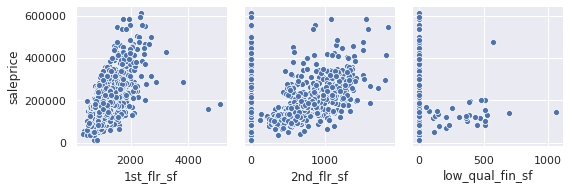

In [23]:
# 1st floor and 2nd floor square footage are good predictors
sns.pairplot(dfnums, x_vars=['1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf'], y_vars=['saleprice']);

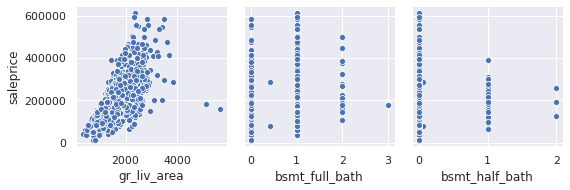

In [24]:
# garage living area is a good preedictor
sns.pairplot(dfnums, x_vars=['gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath'], y_vars=['saleprice']);

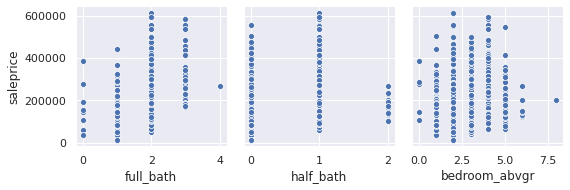

In [25]:
# none of these variables are a good predictor of sale price
sns.pairplot(dfnums, x_vars=['full_bath', 'half_bath', 'bedroom_abvgr'], y_vars=['saleprice']);

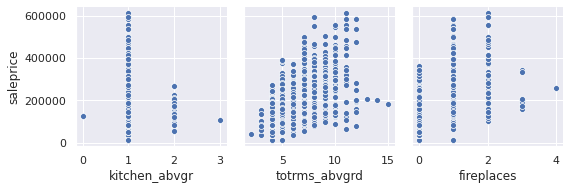

In [26]:
# i cannot say with confidence that any of these are good indicators
sns.pairplot(dfnums, x_vars=['kitchen_abvgr', 'totrms_abvgrd', 'fireplaces'], y_vars=['saleprice']);

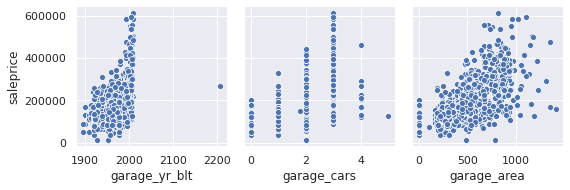

In [27]:
# it appears that garage year built has somewhat a relationship and garage area does too
sns.pairplot(dfnums, x_vars=['garage_yr_blt', 'garage_cars', 'garage_area'], y_vars=['saleprice']);

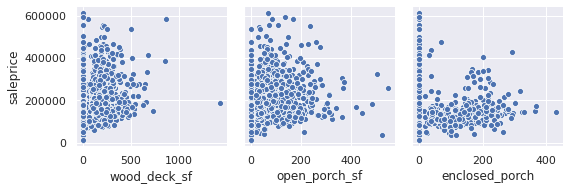

In [28]:
# none of these variables are good predictors of saleprice
sns.pairplot(dfnums, x_vars=['wood_deck_sf', 'open_porch_sf', 'enclosed_porch'], y_vars=['saleprice']);

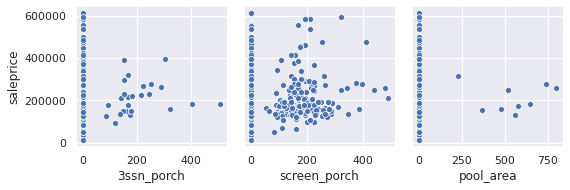

In [29]:
# i cannot say with confidence that any of these variables are good predictors
sns.pairplot(dfnums, x_vars=['3ssn_porch', 'screen_porch', 'pool_area'], y_vars=['saleprice']);

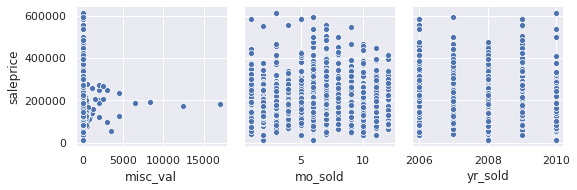

In [30]:
# these are not good predictors of saleprice
sns.pairplot(dfnums, x_vars=['misc_val', 'mo_sold', 'yr_sold'], y_vars=['saleprice']);

In [31]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['year_built']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     995.6
Date:                Sat, 16 May 2020   Prob (F-statistic):          1.92e-178
Time:                        02:50:55   Log-Likelihood:                -25640.
No. Observations:                2051   AIC:                         5.128e+04
Df Residuals:                    2049   BIC:                         5.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.78e+06   9.39e+04    -29.616      0.000   -2.96e+06    -2.6e+06
year_built  1501.8935     47.598     31.554      0.000    1408.548    1595.240
==============================================================================
Omnibus:                      771.609   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3346.746
Skew:                           1.781   Prob(JB):                         0.00
Kurtosis:                       8.145   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['year_remod/add']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     890.3
Date:                Sat, 16 May 2020   Prob (F-statistic):          9.05e-163
Time:                        02:50:56   Log-Likelihood:                -25676.
No. Observations:                2051   AIC:                         5.136e+04
Df Residuals:                    2049   BIC:                         5.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.933e+06   1.38e+05    -28.521      0.000    -4.2e+06   -3.66e+06
year_remod/add  2073.6376     69.495     29.839      0.000    1937.350    2209.926
==============================================================================
Omnibus:                      632.073   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2396.618
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       7.398   Cond. No.                     1.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['total_bsmt_sf']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 16 May 2020   Prob (F-statistic):          4.91e-226
Time:                        02:50:56   Log-Likelihood:                -25530.
No. Observations:                2051   AIC:                         5.106e+04
Df Residuals:                    2049   BIC:                         5.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.414e+04   3483.416     18.413      0.000    5.73e+04     7.1e+04
total_bsmt_sf   110.8998      3.031     36.593      0.000     104.956     116.843
==============================================================================
Omnibus:                      381.957   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4647.620
Skew:                           0.501   Prob(JB):                         0.00
Kurtosis:                      10.306   Cond. No.                     2.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['1st_flr_sf']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1269.
Date:                Sat, 16 May 2020   Prob (F-statistic):          8.79e-217
Time:                        02:50:56   Log-Likelihood:                -25552.
No. Observations:                2051   AIC:                         5.111e+04
Df Residuals:                    2049   BIC:                         5.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.748e+04   4269.115      8.780      0.000    2.91e+04    4.59e+04
1st_flr_sf   123.6493      3.471     35.628      0.000     116.843     130.455
==============================================================================
Omnibus:                      340.107   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.631
Skew:                           0.572   Prob(JB):                         0.00
Kurtosis:                       8.268   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['2nd_flr_sf']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sat, 16 May 2020   Prob (F-statistic):           3.15e-30
Time:                        02:50:56   Log-Likelihood:                -25981.
No. Observations:                2051   AIC:                         5.197e+04
Df Residuals:                    2049   BIC:                         5.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.662e+05   2144.071     77.532      0.000    1.62e+05     1.7e+05
2nd_flr_sf    46.2609      3.984     11.610      0.000      38.447      54.075
==============================================================================
Omnibus:                      664.209   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2200.266
Skew:                           1.615   Prob(JB):                         0.00
Kurtosis:                       6.913   Cond. No.                         680.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['gr_liv_area']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1936.
Date:                Sat, 16 May 2020   Prob (F-statistic):          2.53e-298
Time:                        02:50:56   Log-Likelihood:                -25364.
No. Observations:                2051   AIC:                         5.073e+04
Df Residuals:                    2049   BIC:                         5.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.595e+04   3965.339      4.023      0.000    8176.457    2.37e+04
gr_liv_area   110.3938      2.509     44.004      0.000     105.474     115.314
==============================================================================
Omnibus:                      343.795   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3846.107
Skew:                           0.427   Prob(JB):                         0.00
Kurtosis:                       9.654   Cond. No.                     4.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['garage_yr_blt']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     746.4
Date:                Sat, 16 May 2020   Prob (F-statistic):          2.09e-140
Time:                        02:50:56   Log-Likelihood:                -25727.
No. Observations:                2051   AIC:                         5.146e+04
Df Residuals:                    2049   BIC:                         5.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.096e+06    1.2e+05    -25.806      0.000   -3.33e+06   -2.86e+06
garage_yr_blt  1656.5550     60.633     27.321      0.000    1537.646    1775.464
==============================================================================
Omnibus:                      608.690   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2108.223
Skew:                           1.452   Prob(JB):                         0.00
Kurtosis:                       7.030   Cond. No.                     1.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# get the regression stats to identify if there is a relationship between the x
# and the y
x1 = dfnums['garage_area']
y = dfnums['saleprice'] 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1501.
Date:                Sat, 16 May 2020   Prob (F-statistic):          7.87e-247
Time:                        02:50:56   Log-Likelihood:                -25482.
No. Observations:                2051   AIC:                         5.097e+04
Df Residuals:                    2049   BIC:                         5.098e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.839e+04   3207.431     21.322      0.000    6.21e+04    7.47e+04
garage_area   238.7308      6.162     38.743      0.000     226.647     250.815
==============================================================================
Omnibus:                      392.173   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1482.552
Skew:                           0.900   Prob(JB):                         0.00
Kurtosis:                       6.756   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Evaluate Correlations of Numerical Data

In [39]:
# build a correlation matrix to identify correlations between x and salesprice
dfnums.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
id,1.000000,0.175793,0.026543,-0.023006,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035351,-0.045877,0.000723,0.008555,-0.038346,-0.022650,-0.008388,0.011719,-0.023881,-0.033385,0.014381,-0.059086,-0.042054,0.010605,-0.002400,-0.009092,-0.037560,-0.049245,-0.048656,-0.045192,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
pid,0.175793,1.000000,-0.003632,-0.083615,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.246650,-0.086500,-0.013141,-0.111253,-0.203745,-0.145862,-0.005598,0.072268,-0.112936,-0.030538,-0.001945,-0.179370,-0.163975,0.009122,0.068416,-0.084999,-0.120710,-0.243816,-0.228307,-0.200838,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
ms_subclass,0.026543,-0.003632,1.000000,-0.364323,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004035,-0.060843,-0.068253,-0.139885,-0.225997,-0.246212,0.305771,0.031091,0.068210,0.025046,-0.017243,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,0.079643,-0.049147,-0.108226,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
lot_frontage,-0.023006,-0.083615,-0.364323,1.000000,0.389501,0.182459,-0.049777,0.104661,0.079740,0.200127,0.198451,0.032764,0.118339,0.332854,0.429211,0.012274,-0.000284,0.350425,0.101798,-0.028365,0.138849,0.032405,0.200617,0.014718,0.332602,0.225843,0.062607,0.280394,0.338862,0.101366,0.170315,-0.003030,0.028592,0.068031,0.141304,0.048344,-0.016011,0.008396,0.325850
lot_area,0.032872,0.024135,-0.245484,0.389501,1.000000,0.105824,-0.019185,0.036002,0.050771,0.168742,0.215410,0.041713,0.041180,0.277150,0.381593,0.029398,0.001273,0.327427,0.115263,0.029757,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004840,0.214953,0.263294,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
overall_qual,-0.061483,-0.265863,0.035763,0.182459,0.105824,1.000000,-0.082770,0.602964,0.584654,0.435988,0.278593,-0.028184,0.275625,0.548448,0.477136,0.228152,-0.052338,0.566701,0.175051,-0.047286,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.546091,0.587336,0.563731,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
overall_cond,-0.026096,0.106861,-0.070141,-0.049777,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135520,-0.045749,0.047791,-0.130467,-0.158577,-0.150938,0.010912,0.004753,-0.109804,-0.039080,0.100241,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.309931,-0.168506,-0.137912,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
year_built,-0.064444,-0.347039,0.035983,0.104661,0.036002,0.602964,-0.370988,1.000000,0.629116,0.327649,0.275392,-0.021028,0.136638,0.410181,0.323315,0.022313,-0.159403,0.258838,0.215152,-0.031457,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.776752,0.542198,0.486867,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
year_remod/add,-0.090040,-0.176666,0.044836,0.079740,0.050771,0.584654,0.042614,0.629116,1.000000,0.210327,0.166573,-0.057126,0.159962,0.308346,0.244190,0.159605,-0.066577,0.322407,0.153397,-0.037895,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.646959,0.441743,0.398951,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
mas_vnr_area,-0.035351,-0.246650,-0.004035,0.200127,0.168742,0.435988,-0.135520,0.327649,0.210327,1.000000,0.319682,-0.016737,0.085269,0.4063

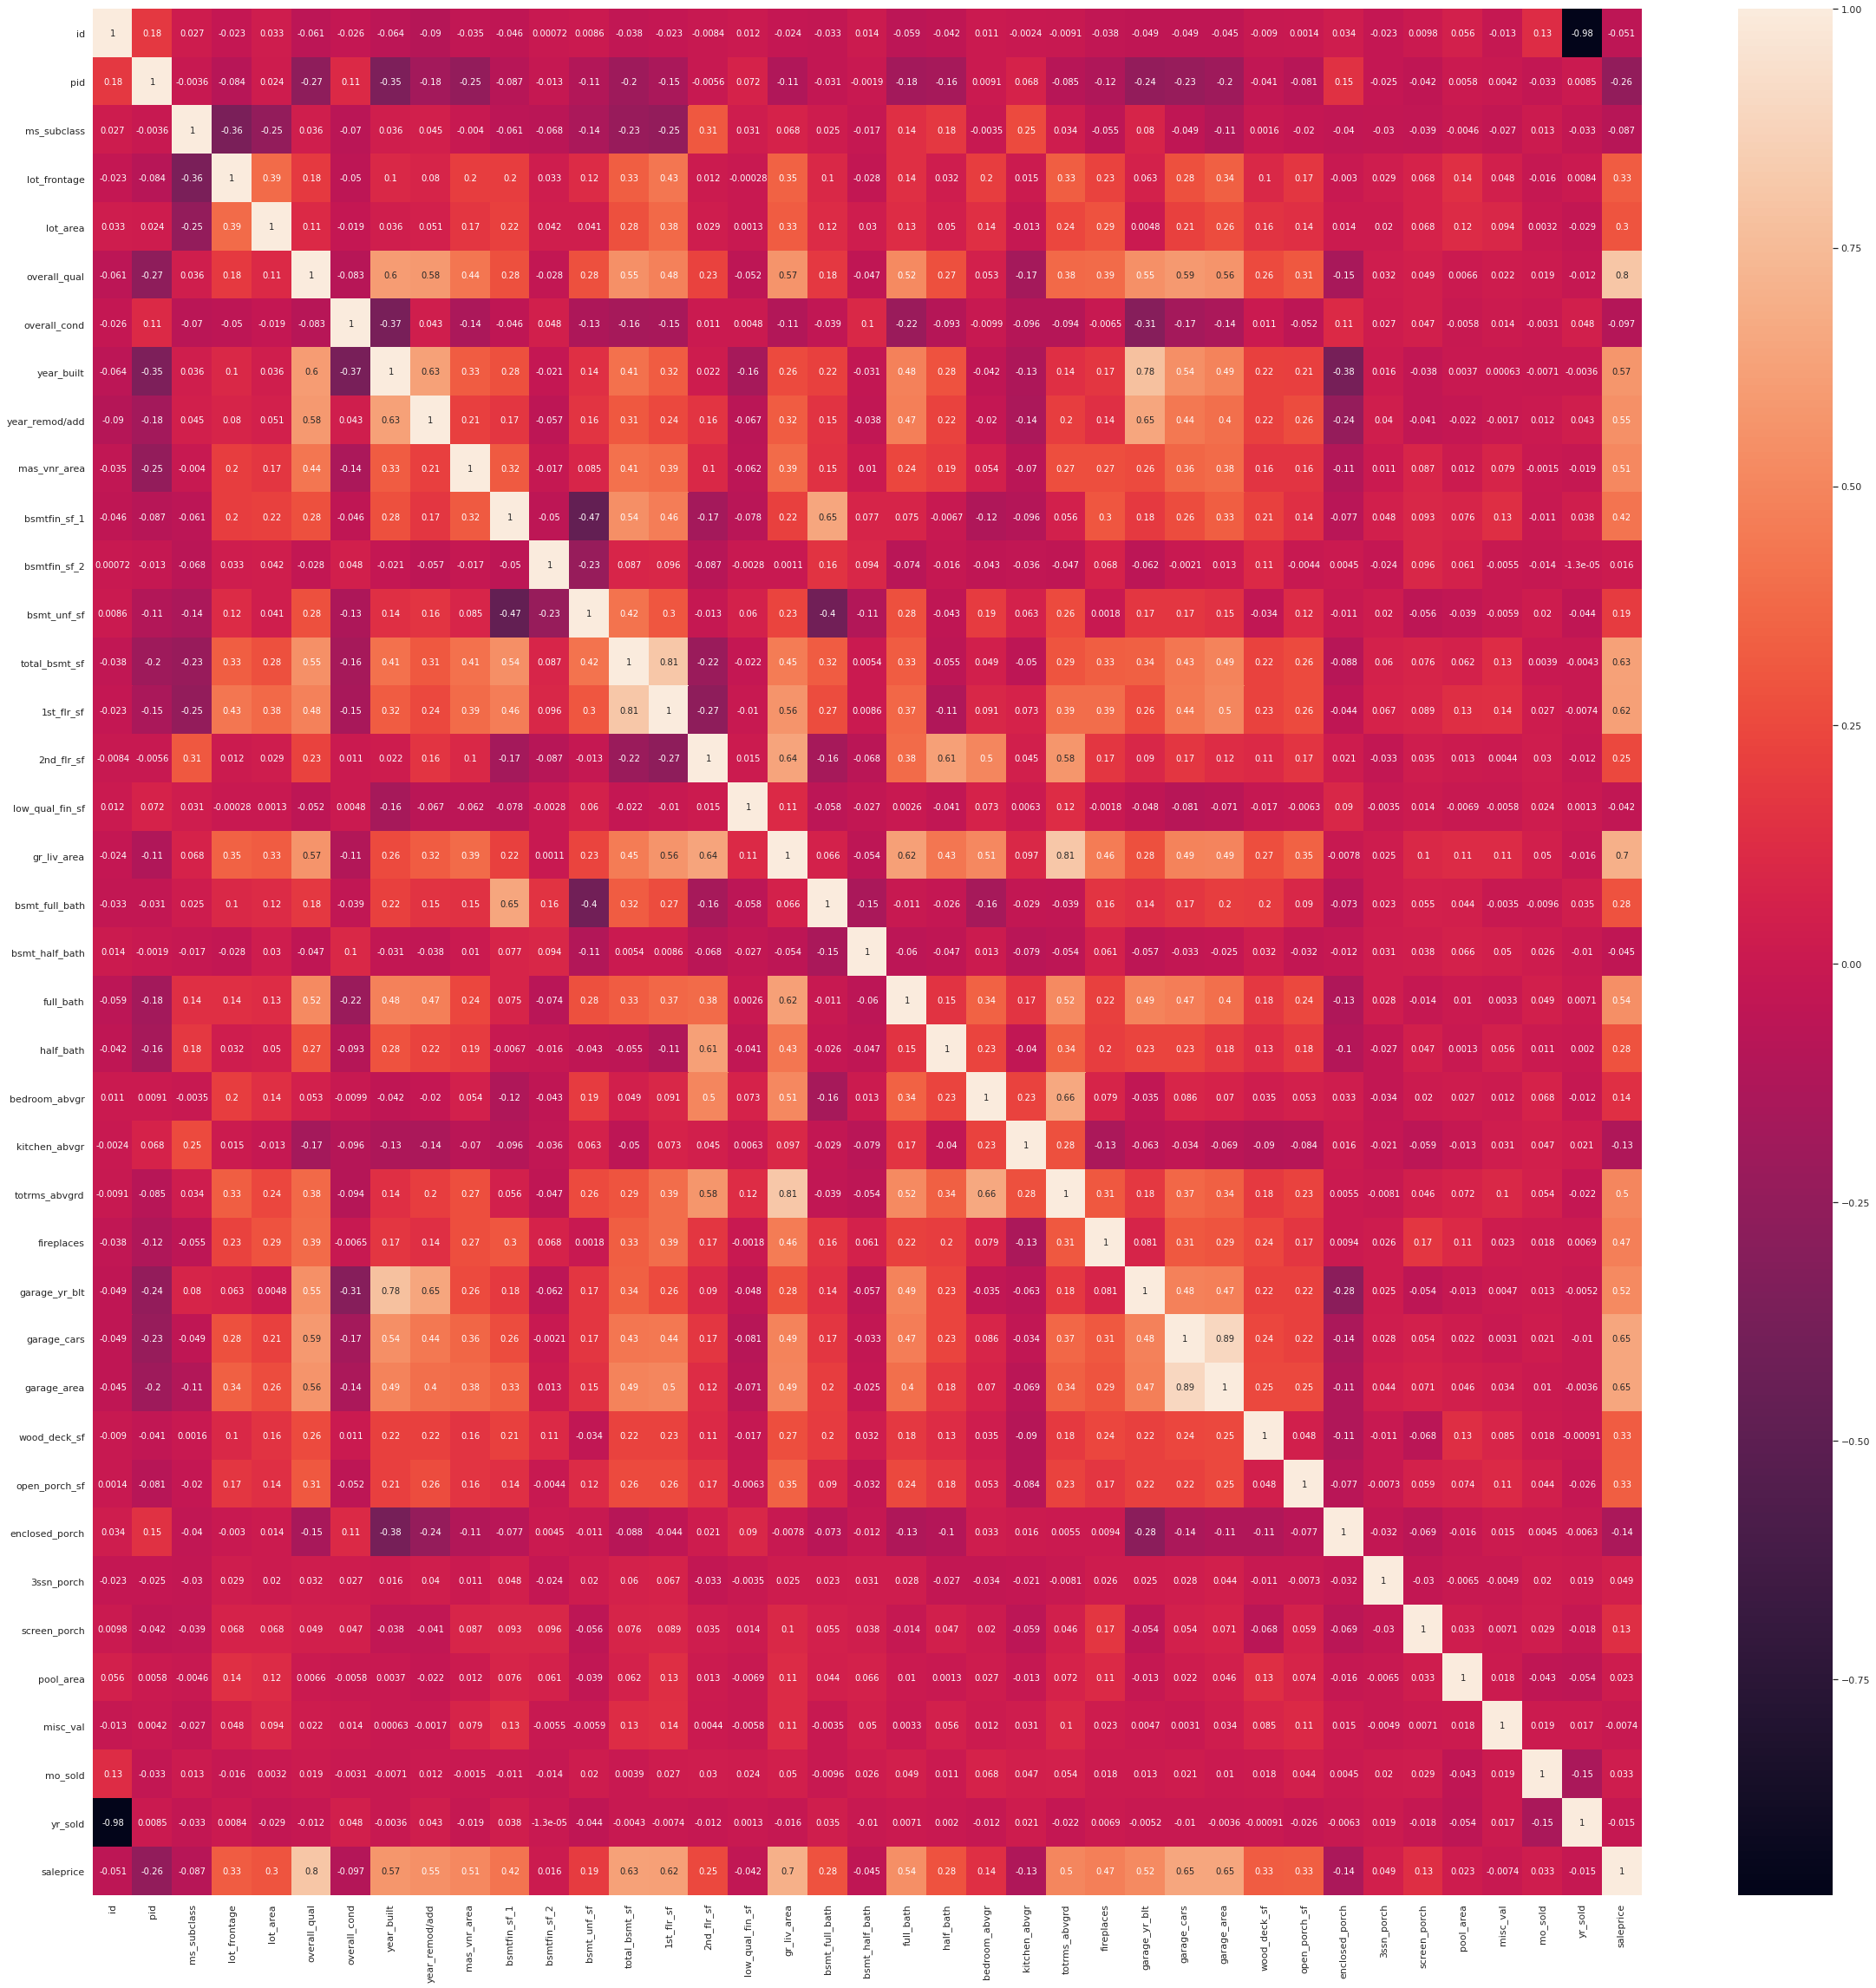

In [40]:
# build a heat map to visualize better the correlation matrix
plt.figure(figsize=(40,40))
sns.heatmap(dfnums.corr(), annot=True);

##### Identify Distributions

In [0]:
# create a random number from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width, random_state=42)

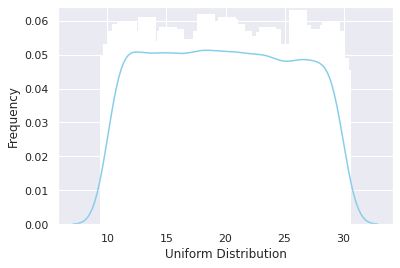

In [42]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth': 15, 'alpha':1})
ax.set(xlabel='Uniform Distribution', ylabel='Frequency');

### Set Model

In [0]:
# create a features variable all columns in dfnums except 'saleprice'
features = [col for col in dfnums._get_numeric_data().columns if col != 'saleprice']

# assign features to X
X = dfnums[features]

# assign saleprice to y
y = dfnums['saleprice']

In [0]:
# create the train-test split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# take every data point, extract the mean and divide by the standard deviation
# turns it into a normal distribution
# making the weights of data points equal
# z-scores - learn this.

ss = StandardScaler() # preprocessing
X_train = ss.fit_transform(X_train) # teach the model on our train data, transform to be between -1 and 1
X_test = ss.transform(X_test) 
# test is testing our model
# we don't want the model to know fit, we don't usually have a test set


lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

# cross_val_score uses default score for the model

lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
print(f'Linear Regression cross_val_mean: {round(lr_scores.mean(), 4)}')

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
print(f'Lasso Regression cross_val_mean: {round(lasso_scores.mean(), 4)}')

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
print(f'Ridge Score cross_val_mean: {round(ridge_scores.mean(), 4)}')

# fitting (training) the models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# calculate predictions (testing) for each model
# we are producing the y_test
lrpred = lr.predict(X_test)
laspred = lasso.predict(X_test)
rpred = ridge.predict(X_test)

print()

# calculate r2 score for each model
print(f'R\u00b2 Linear Regression score: {round(r2_score(y_test, lrpred), 4)}')
print(f'R\u00b2 Lasso Regression score: {round(r2_score(y_test, laspred), 4)}')
print(f'R\u00b2 Ridge Regression score: {round(r2_score(y_test, rpred), 4)}')

print()

# calculate residuals
lrresiduals = y_test - lrpred
lasresiduals = y_test - laspred
rresiduals = y_test - rpred

# calculate mean squared error
print(f'Linear Regression MSE: {round(metrics.mean_squared_error(y_test, lrpred))}')
print(f'Lasso Regression MSE: {round(metrics.mean_squared_error(y_test, laspred))}')
print(f'Ridge Regression MSE: {round(metrics.mean_squared_error(y_test, rpred))}')

print()

# calculate the root mean squared error
print(f'Linear Regression RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test, lrpred)))}')
print(f'Lasso Regression RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test, laspred)))}')
print(f'Ridge Regression RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test, rpred)))}')

Linear Regression cross_val_mean: 0.7498
Lasso Regression cross_val_mean: 0.7562
Ridge Score cross_val_mean: 0.7523

R² Linear Regression score: 0.8598
R² Lasso Regression score: 0.8604
R² Ridge Regression score: 0.8597

Linear Regression MSE: 860979150.0
Lasso Regression MSE: 856937920.0
Ridge Regression MSE: 861630485.0

Linear Regression RMSE: 29342.0
Lasso Regression RMSE: 29274.0
Ridge Regression RMSE: 29354.0


### Export Cleantrain.CSV

In [0]:
# export the cleaned version of the train.csv
dfnums.to_csv('cleantrain.csv', index=False)

## Test.CSV

### Import the Dataset

In [0]:
# read in the test.csv
testdf = pd.read_csv('test.csv')

In [49]:
# get basic info on the test.csv
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### Clean Data

#### Change Feature Formatting

In [0]:
# lowercase everything, strip out spaces and replace with '_' and strip white space
# credit: Quinton
testdf.columns = testdf.columns.str.strip().str.lower().str.replace(' ', '_')

In [51]:
# verify changes were made
testdf.head(0)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type


#### Resolve Missing Numeric Data

In [0]:
# remove 'object' dtypes
# from dataframe to resolve missing numeric values
# credit: StackOverflow
testdfnums = testdf.select_dtypes(exclude=['object'])

In [53]:
# identify the number of missing values in each feature
testdfnums.isnull().sum().sort_values(ascending=False)

lot_frontage       160
garage_yr_blt       45
mas_vnr_area         1
yr_sold              0
2nd_flr_sf           0
1st_flr_sf           0
total_bsmt_sf        0
bsmt_unf_sf          0
bsmtfin_sf_2         0
bsmtfin_sf_1         0
year_remod/add       0
gr_liv_area          0
year_built           0
overall_cond         0
overall_qual         0
lot_area             0
ms_subclass          0
pid                  0
low_qual_fin_sf      0
bsmt_full_bath       0
mo_sold              0
bsmt_half_bath       0
misc_val             0
pool_area            0
screen_porch         0
3ssn_porch           0
enclosed_porch       0
open_porch_sf        0
wood_deck_sf         0
garage_area          0
garage_cars          0
fireplaces           0
totrms_abvgrd        0
kitchen_abvgr        0
bedroom_abvgr        0
half_bath            0
full_bath            0
id                   0
dtype: int64

In [54]:
# use .fillna to replace all missing numeric values
# with the mean of values for each feature
# credit: https://machinelearningmastery.com/handle-missing-data-python/
testdfnums.fillna(testdf.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
# confirm numeric missing values are resolved
testdfnums.isnull().sum().sort_values(ascending=False)

yr_sold            0
mas_vnr_area       0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
total_bsmt_sf      0
bsmt_unf_sf        0
bsmtfin_sf_2       0
bsmtfin_sf_1       0
year_remod/add     0
mo_sold            0
year_built         0
overall_cond       0
overall_qual       0
lot_area           0
lot_frontage       0
ms_subclass        0
pid                0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
misc_val           0
pool_area          0
screen_porch       0
3ssn_porch         0
enclosed_porch     0
open_porch_sf      0
wood_deck_sf       0
garage_area        0
garage_cars        0
garage_yr_blt      0
fireplaces         0
totrms_abvgrd      0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
id                 0
dtype: int64

In [56]:
# confirm that the shape on the test.csv is 878 for Kaggle competition
testdfnums.shape

(878, 38)

In [57]:
dfnums.shape

(2051, 39)

### Set Model

In [0]:
# prevent copy warning by changing the variable of X
test_X = testdfnums[features]

In [0]:
# transform test_x into a scaled version
test_X = ss.transform(test_X)

In [0]:
# assign the predicted sale prices to predictedprices
predictedprices = lr.predict(test_X)

In [61]:
# confirm that the shape of predicted prices is still 878
predictedprices.shape

(878,)

### Export Submission.CSV

In [0]:
# assign a new Dataframe with only the ID numbers and the predicted sales prices
submission = pd.DataFrame({'Id': testdf['id'], 'SalePrice' : predictedprices})

# export the csv as submission
submission.to_csv('submission2.csv', index=False)